# EDA: Borussia Dortmund Example
- Sanity-Checking

**Relevant Minimum Data**

Non-negotiables variables to start modeling the hypothesis.

In [26]:
import pandas as pd
from pathlib import Path

# Build an environment-agnostic path to the data file (relative to the project root)
project_root = Path().resolve()
data_path = project_root / "Data" / "2025:2026.csv"

df = pd.read_csv(data_path)

# Filter for Borussia Dortmund as either HomeTeam or AwayTeam
dortmund_df = df[(df['HomeTeam'] == 'Dortmund') | (df['AwayTeam'] == 'Dortmund')]

# Select and display the specified columns
display(dortmund_df[['Date', 'HomeTeam', 'AwayTeam', 'HC', 'AC']].head())

,Date,HomeTeam,AwayTeam,HC,AC
6,23/08/2025,St Pauli,Dortmund,5,2
16,31/08/2025,Dortmund,Union Berlin,4,6
20,13/09/2025,Heidenheim,Dortmund,5,4
35,21/09/2025,Dortmund,Wolfsburg,9,3
38,27/09/2025,Mainz,Dortmund,7,5


**Sanity Check**
1. Are the numbers for corners realistic?
2. Do home/away roles flip correctly?
3. Does Dortmund look different home vs away?

**Distribution Visualizations**

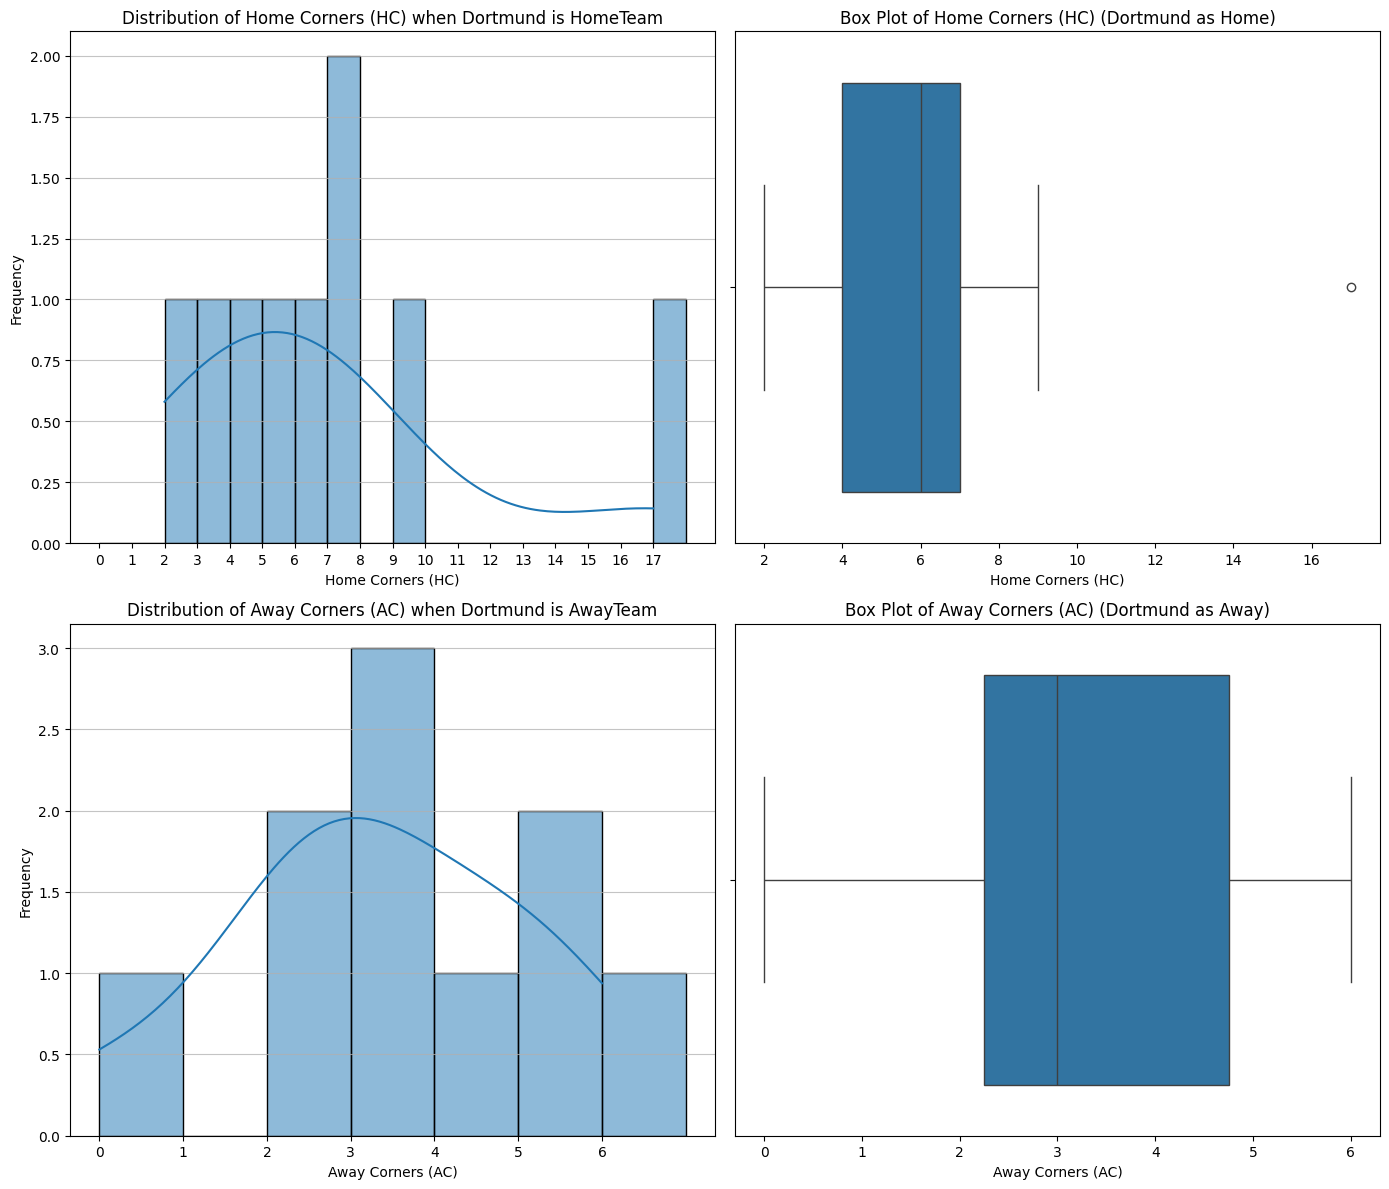

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Dortmund as HomeTeam and AwayTeam
dortmund_home_df = dortmund_df[dortmund_df['HomeTeam'] == 'Dortmund']
dortmund_away_df = dortmund_df[dortmund_df['AwayTeam'] == 'Dortmund']

# Set up two rows of plots: 
# First row = Dortmund as Home (HC), Second row = Dortmund as Away (AC)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# --- Dortmund as HomeTeam ---
# Histogram for HC
sns.histplot(
    dortmund_home_df['HC'].dropna(), 
    kde=True,
    bins=range(0, int(dortmund_home_df['HC'].max()) + 2),
    ax=axes[0, 0]
)
axes[0, 0].set_title('Distribution of Home Corners (HC) when Dortmund is HomeTeam')
axes[0, 0].set_xlabel('Home Corners (HC)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_xticks(range(0, int(dortmund_home_df['HC'].max()) + 1))
axes[0, 0].grid(axis='y', alpha=0.75)

# Box plot for HC
sns.boxplot(x=dortmund_home_df['HC'].dropna(), ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Home Corners (HC) (Dortmund as Home)')
axes[0, 1].set_xlabel('Home Corners (HC)')

# --- Dortmund as AwayTeam ---
# Bar plot for AC (Away Corners)
sns.histplot(
    dortmund_away_df['AC'].dropna(), 
    kde=True,
    bins=range(0, int(dortmund_away_df['AC'].max()) + 2),
    ax=axes[1, 0]
)
axes[1, 0].set_title('Distribution of Away Corners (AC) when Dortmund is AwayTeam')
axes[1, 0].set_xlabel('Away Corners (AC)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xticks(range(0, int(dortmund_away_df['AC'].max()) + 1))
axes[1, 0].grid(axis='y', alpha=0.75)

# Box plot for AC
sns.boxplot(x=dortmund_away_df['AC'].dropna(), ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Away Corners (AC) (Dortmund as Away)')
axes[1, 1].set_xlabel('Away Corners (AC)')

plt.tight_layout()
plt.show()

- Corners are in a believable range (4–9).
- There are limited anomalies, such as an outlier of 17 corners. 
- Home/away split behaves plausibly

# Preparing the Core Modeling Sample for Training

## Importing

- Importing the datasets "2023:2024.csv" and "2024:2025.csv", adding a "Season" column to each with its respective value.

**2023/2024**

In [28]:
from pathlib import Path

data_path_2023_2024 = project_root / "Data" / "2023:2024.csv"

df_2023_2024 = pd.read_csv(data_path_2023_2024)
df_2023_2024['Season'] = '2023:2024'
print("DataFrame 'df_2023_2024' loaded and 'Season' column added. Displaying head:")
display(df_2023_2024.head())

DataFrame 'df_2023_2024' loaded and 'Season' column added. Displaying head:


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Season
0,D1,18/08/2023,19:30,Werder Bremen,Bayern Munich,0,4,A,0,1,...,1.75,1.85,2.08,1.88,2.03,1.92,2.09,1.85,2.00,2023:2024
1,D1,19/08/2023,14:30,Augsburg,M'gladbach,4,4,D,3,3,...,0.25,1.82,2.11,1.83,2.11,1.83,2.18,1.77,2.09,2023:2024
2,D1,19/08/2023,14:30,Hoffenheim,Freiburg,1,2,A,0,2,...,-0.25,1.91,2.02,1.92,2.01,1.98,2.02,1.91,1.95,2023:2024
3,D1,19/08/2023,14:30,Leverkusen,RB Leipzig,3,2,H,2,1,...,-0.25,2.11,1.82,2.14,1.84,2.14,1.84,2.09,1.78,2023:2024
4,D1,19/08/2023,14:30,Stuttgart,Bochum,5,0,H,2,0,...,-0.75,1.98,1.95,1.99,1.93,2.06,1.96,1.95,1.89,2023:2024


**2024/2025**

In [29]:
data_path_2024_2025 = project_root / "Data" / "2024:2025.csv"

df_2024_2025 = pd.read_csv(data_path_2024_2025)
df_2024_2025['Season'] = '2024:2025'
print("DataFrame 'df_2024_2025' loaded and 'Season' column added. Displaying head:")
display(df_2024_2025.head())

DataFrame 'df_2024_2025' loaded and 'Season' column added. Displaying head:


/var/folders/3l/3r33nlzx08x33ms97984bk_m0000gn/T/ipykernel_88259/1606580608.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_2024_2025['Season'] = '2024:2025'


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA,Season
0,D1,23/08/2024,19:30,M'gladbach,Leverkusen,2,3,A,0.0,2.0,...,2.04,1.87,2.06,1.96,2.08,1.91,1.96,1.91,2.07,2024:2025
1,D1,24/08/2024,14:30,Augsburg,Werder Bremen,2,2,D,2.0,1.0,...,2.05,1.88,2.04,1.88,2.06,1.86,2.03,1.90,2.10,2024:2025
2,D1,24/08/2024,14:30,Freiburg,Stuttgart,3,1,H,1.0,1.0,...,1.98,1.95,1.97,1.98,2.09,1.87,2.00,1.95,2.04,2024:2025
3,D1,24/08/2024,14:30,Hoffenheim,Holstein Kiel,3,2,H,2.0,0.0,...,1.90,1.99,1.93,2.16,1.95,2.02,1.86,2.00,1.95,2024:2025
4,D1,24/08/2024,14:30,Mainz,Union Berlin,1,1,D,0.0,0.0,...,1.83,2.11,1.83,2.13,1.85,2.07,1.81,2.18,1.84,2024:2025


## Merging

- Merging the two datasets and display the 'Date', 'HomeTeam', 'AwayTeam', 'HC', 'AC', and 'Season' columns. Using `pd.concat` to combine `df_2023_2024` and `df_2024_2025` vertically, resetting the index, and then displaying the head of the resulting `merged_df` to confirm the operation.

Getting all columns that are missing in either dataset (these will be dropped after merge)

In [30]:
# Find columns present in one dataframe but not the other
cols_2023 = set(df_2023_2024.columns)
cols_2024 = set(df_2024_2025.columns)

missing_in_2024 = cols_2023 - cols_2024
missing_in_2023 = cols_2024 - cols_2023

print(f"Number of columns in df_2023_2024: {len(cols_2023)}")
print(f"Number of columns in df_2024_2025: {len(cols_2024)}")
print(f"Columns present in df_2023_2024 but missing in df_2024_2025 ({len(missing_in_2024)}):")
print(missing_in_2024)
print(f"Columns present in df_2024_2025 but missing in df_2023_2024 ({len(missing_in_2023)}):")
print(missing_in_2023)

# Store missing columns in a DataFrame for reference and later dropping
missing_columns_data = {
    'Column': list(missing_in_2024) + list(missing_in_2023),
    'Missing_In': ['df_2024_2025'] * len(missing_in_2024) + ['df_2023_2024'] * len(missing_in_2023),
    'Source_DataFrame': ['df_2023_2024'] * len(missing_in_2024) + ['df_2024_2025'] * len(missing_in_2023)
}
missing_columns_df = pd.DataFrame(missing_columns_data)
missing_columns_df = missing_columns_df.sort_values(['Missing_In', 'Column']).reset_index(drop=True)

print("\n" + "=" * 80)
print("Missing Columns DataFrame:")
print("=" * 80)
display(missing_columns_df)

# Get all columns that are missing in either dataset (these will be dropped after merge)
all_missing_columns = list(missing_in_2024 | missing_in_2023)
print(f"\nTotal unique columns to drop after merge: {len(all_missing_columns)}")
print(f"Columns to drop: {sorted(all_missing_columns)}")



Number of columns in df_2023_2024: 106
Number of columns in df_2024_2025: 120
Columns present in df_2023_2024 but missing in df_2024_2025 (12):
{'VCH', 'VCD', 'IWA', 'VCCA', 'IWH', 'VCCD', 'IWCD', 'VCCH', 'IWCA', 'IWCH', 'IWD', 'VCA'}
Columns present in df_2024_2025 but missing in df_2023_2024 (26):
{'BFH', '1XBCA', 'BFCA', 'BFCD', 'BFECAHA', 'BFE<2.5', 'BFA', 'BFE>2.5', 'BFEAHA', 'BFECA', '1XBA', 'BFED', 'BFEH', '1XBD', 'BFEAHH', 'BFECD', '1XBH', 'BFECAHH', 'BFCH', 'BFECH', '1XBCD', 'BFEC>2.5', 'BFD', '1XBCH', 'BFEA', 'BFEC<2.5'}

Missing Columns DataFrame:


,Column,Missing_In,Source_DataFrame
0,1XBA,df_2023_2024,df_2024_2025
1,1XBCA,df_2023_2024,df_2024_2025
2,1XBCD,df_2023_2024,df_2024_2025
3,1XBCH,df_2023_2024,df_2024_2025
4,1XBD,df_2023_2024,df_2024_2025
5,1XBH,df_2023_2024,df_2024_2025
6,BFA,df_2023_2024,df_2024_2025
7,BFCA,df_2023_2024,df_2024_2025
8,BFCD,df_2023_2024,df_2024_2025
9,BFCH,df_2023_2024,df_2024_2025



Total unique columns to drop after merge: 38
Columns to drop: ['1XBA', '1XBCA', '1XBCD', '1XBCH', '1XBD', '1XBH', 'BFA', 'BFCA', 'BFCD', 'BFCH', 'BFD', 'BFE<2.5', 'BFE>2.5', 'BFEA', 'BFEAHA', 'BFEAHH', 'BFEC<2.5', 'BFEC>2.5', 'BFECA', 'BFECAHA', 'BFECAHH', 'BFECD', 'BFECH', 'BFED', 'BFEH', 'BFH', 'IWA', 'IWCA', 'IWCD', 'IWCH', 'IWD', 'IWH', 'VCA', 'VCCA', 'VCCD', 'VCCH', 'VCD', 'VCH']


Mapping missing column acronyms to readable names

In [31]:
# Map missing column acronyms to readable names based on football-data.co.uk notes
# Reference: Data/football-data.co.uk_notes.txt.pdf

print("=" * 80)
print("MISSING COLUMNS MAPPING - Readable Names")
print("=" * 80)

print("\nColumns in df_2023_2024 but MISSING in df_2024_2025 (12 columns):")
print("-" * 80)

missing_2024_readable = {
    'VCH': 'VC Bet home win odds (now BetVictor)',
    'VCD': 'VC Bet draw odds (now BetVictor)',
    'VCA': 'VC Bet away win odds (now BetVictor)',
    'VCCH': 'VC Bet closing home win odds (now BetVictor)',
    'VCCD': 'VC Bet closing draw odds (now BetVictor)',
    'VCCA': 'VC Bet closing away win odds (now BetVictor)',
    'IWH': 'Interwetten home win odds',
    'IWD': 'Interwetten draw odds',
    'IWA': 'Interwetten away win odds',
    'IWCH': 'Interwetten closing home win odds',
    'IWCD': 'Interwetten closing draw odds',
    'IWCA': 'Interwetten closing away win odds'
}

for col in sorted(missing_in_2024):
    readable = missing_2024_readable.get(col, 'Unknown')
    print(f"  • {col:12} → {readable}")

print("\nColumns in df_2024_2025 but MISSING in df_2023_2024 (26 columns):")
print("-" * 80)

missing_2023_readable = {
    # 1XBet odds
    '1XBH': '1XBet home win odds',
    '1XBD': '1XBet draw odds',
    '1XBA': '1XBet away win odds',
    '1XBCH': '1XBet closing home win odds',
    '1XBCD': '1XBet closing draw odds',
    '1XBCA': '1XBet closing away win odds',
    
    # Betfair regular odds
    'BFH': 'Betfair home win odds',
    'BFD': 'Betfair draw odds',
    'BFA': 'Betfair away win odds',
    'BFCH': 'Betfair closing home win odds',
    'BFCD': 'Betfair closing draw odds',
    'BFCA': 'Betfair closing away win odds',
    
    # Betfair Exchange odds
    'BFEH': 'Betfair Exchange home win odds',
    'BFED': 'Betfair Exchange draw odds',
    'BFEA': 'Betfair Exchange away win odds',
    
    # Betfair Exchange total goals
    'BFE>2.5': 'Betfair Exchange over 2.5 goals',
    'BFE<2.5': 'Betfair Exchange under 2.5 goals',
    'BFEC>2.5': 'Betfair Exchange closing over 2.5 goals',
    'BFEC<2.5': 'Betfair Exchange closing under 2.5 goals',
    
    # Betfair Exchange Asian handicap
    'BFEAHH': 'Betfair Exchange Asian handicap home team odds',
    'BFEAHA': 'Betfair Exchange Asian handicap away team odds',
    'BFECAHH': 'Betfair Exchange closing Asian handicap home team odds',
    'BFECAHA': 'Betfair Exchange closing Asian handicap away team odds'
}

for col in sorted(missing_in_2023):
    readable = missing_2023_readable.get(col, 'Unknown')
    print(f"  • {col:12} → {readable}")

print("\n" + "=" * 80)
print("SUMMARY:")
print("=" * 80)
print(f"• df_2023_2024 missing columns: Mostly VC Bet (now BetVictor) and Interwetten odds")
print(f"• df_2024_2025 missing columns: Mostly 1XBet and Betfair Exchange odds")
print(f"• These differences reflect changes in bookmaker data availability between seasons")
print("=" * 80)


MISSING COLUMNS MAPPING - Readable Names

Columns in df_2023_2024 but MISSING in df_2024_2025 (12 columns):
--------------------------------------------------------------------------------
  • IWA          → Interwetten away win odds
  • IWCA         → Interwetten closing away win odds
  • IWCD         → Interwetten closing draw odds
  • IWCH         → Interwetten closing home win odds
  • IWD          → Interwetten draw odds
  • IWH          → Interwetten home win odds
  • VCA          → VC Bet away win odds (now BetVictor)
  • VCCA         → VC Bet closing away win odds (now BetVictor)
  • VCCD         → VC Bet closing draw odds (now BetVictor)
  • VCCH         → VC Bet closing home win odds (now BetVictor)
  • VCD          → VC Bet draw odds (now BetVictor)
  • VCH          → VC Bet home win odds (now BetVictor)

Columns in df_2024_2025 but MISSING in df_2023_2024 (26 columns):
--------------------------------------------------------------------------------
  • 1XBA         → 1XBet 

Merging the two dataframes

In [32]:
# Merge the two dataframes
merged_df = pd.concat([df_2023_2024, df_2024_2025], ignore_index=True)

# Drop all columns that are missing in either dataset (stored in all_missing_columns)
print(f"Before dropping missing columns: {merged_df.shape[1]} columns")
merged_df = merged_df.drop(columns=all_missing_columns, errors='ignore')
print(f"After dropping missing columns: {merged_df.shape[1]} columns")
print(f"Dropped {len(all_missing_columns)} columns that were missing in one of the datasets")

print("\nDataFrames 'df_2023_2024' and 'df_2024_2025' merged into 'merged_df' (with missing columns dropped). Displaying head:")
display(merged_df.head())

Before dropping missing columns: 132 columns
After dropping missing columns: 94 columns
Dropped 38 columns that were missing in one of the datasets

DataFrames 'df_2023_2024' and 'df_2024_2025' merged into 'merged_df' (with missing columns dropped). Displaying head:


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Season
0,D1,18/08/2023,19:30,Werder Bremen,Bayern Munich,0,4,A,0.0,1.0,...,1.75,1.85,2.08,1.88,2.03,1.92,2.09,1.85,2.00,2023:2024
1,D1,19/08/2023,14:30,Augsburg,M'gladbach,4,4,D,3.0,3.0,...,0.25,1.82,2.11,1.83,2.11,1.83,2.18,1.77,2.09,2023:2024
2,D1,19/08/2023,14:30,Hoffenheim,Freiburg,1,2,A,0.0,2.0,...,-0.25,1.91,2.02,1.92,2.01,1.98,2.02,1.91,1.95,2023:2024
3,D1,19/08/2023,14:30,Leverkusen,RB Leipzig,3,2,H,2.0,1.0,...,-0.25,2.11,1.82,2.14,1.84,2.14,1.84,2.09,1.78,2023:2024
4,D1,19/08/2023,14:30,Stuttgart,Bochum,5,0,H,2.0,0.0,...,-0.75,1.98,1.95,1.99,1.93,2.06,1.96,1.95,1.89,2023:2024


**Reasoning**:
The previous step successfully merged the two dataframes. The necessary columns are displayed below.



In [8]:
selected_df = merged_df[['Date', 'HomeTeam', 'AwayTeam', 'HC', 'AC', 'Season']]
print("Displaying selected columns from merged_df:")
display(selected_df.head())

Displaying selected columns from merged_df:


,Date,HomeTeam,AwayTeam,HC,AC,Season
0,18/08/2023,Werder Bremen,Bayern Munich,0.0,6.0,2023:2024
1,19/08/2023,Augsburg,M'gladbach,8.0,7.0,2023:2024
2,19/08/2023,Hoffenheim,Freiburg,4.0,2.0,2023:2024
3,19/08/2023,Leverkusen,RB Leipzig,4.0,5.0,2023:2024
4,19/08/2023,Stuttgart,Bochum,7.0,0.0,2023:2024


Inspection

In [9]:

# Calculate mean HC for HomeTeam "Dortmund" and mean AC for AwayTeam "Dortmund", for each Season
results = []

for season in selected_df['Season'].unique():
    season_df = selected_df[selected_df['Season'] == season]

    # Mean HC when Dortmund is HomeTeam
    dortmund_home = season_df[season_df['HomeTeam'] == 'Dortmund']
    mean_hc = dortmund_home['HC'].mean()

    # Mean AC when Dortmund is AwayTeam
    dortmund_away = season_df[season_df['AwayTeam'] == 'Dortmund']
    mean_ac = dortmund_away['AC'].mean()

    results.append({
        'Season': season,
        'Mean HC (Dortmund Home)': mean_hc,
        'Mean AC (Dortmund Away)': mean_ac
    })

results_df = pd.DataFrame(results)
print("Mean HC (Dortmund as Home) and Mean AC (Dortmund as Away) per Season:")
display(results_df)




Mean HC (Dortmund as Home) and Mean AC (Dortmund as Away) per Season:


,Season,Mean HC (Dortmund Home),Mean AC (Dortmund Away)
0,2023:2024,6.000000,4.352941
1,2024:2025,6.411765,4.823529


Mean, Variance, and Standard Deviation for HC (Dortmund as Home) and AC (Dortmund as Away) per Season:


,Season,Mean HC (Dortmund Home),Mean AC (Dortmund Away),Variance HC (Dortmund Home),Variance AC (Dortmund Away),Std Dev HC (Dortmund Home),Std Dev AC (Dortmund Away)
0,2023:2024,6.000000,4.352941,5.375000,4.742647,2.318405,2.177762
1,2024:2025,6.411765,4.823529,6.882353,9.529412,2.623424,3.086975


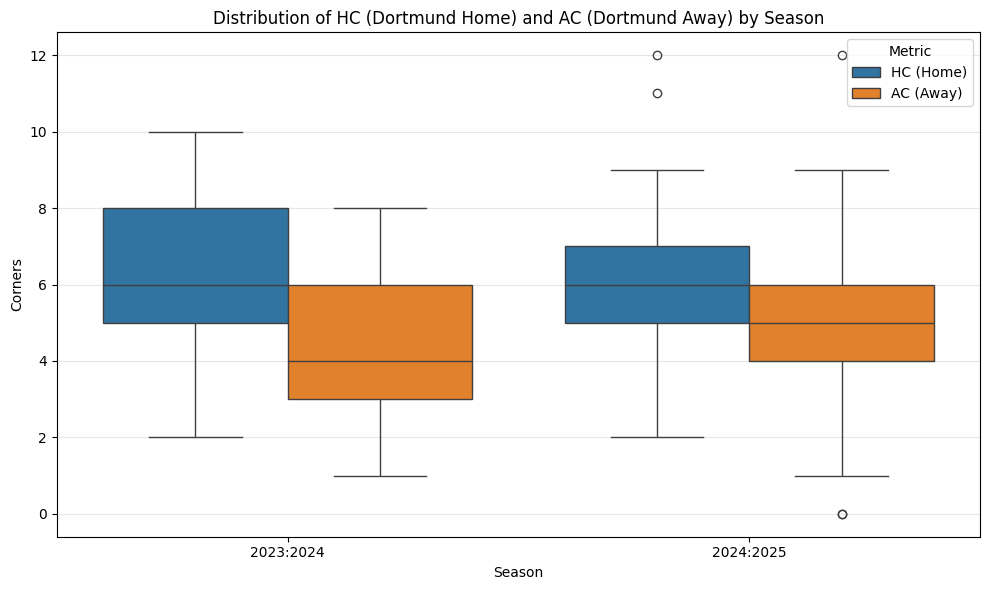

In [10]:
# Calculate variance for HC (Dortmund Home) and AC (Dortmund Away) per season
results = []

for season in merged_df['Season'].unique():
    season_data = merged_df[merged_df['Season'] == season]
    
    # Filter for Dortmund home matches
    dortmund_home = season_data[season_data['HomeTeam'] == 'Dortmund']
    
    # Filter for Dortmund away matches
    dortmund_away = season_data[season_data['AwayTeam'] == 'Dortmund']
    
    # Calculate means
    mean_hc = dortmund_home['HC'].mean()
    mean_ac = dortmund_away['AC'].mean()
    
    # Calculate variances
    var_hc = dortmund_home['HC'].var()
    var_ac = dortmund_away['AC'].var()
    
    # Calculate standard deviations (for reference)
    std_hc = dortmund_home['HC'].std()
    std_ac = dortmund_away['AC'].std()
    
    results.append({
        'Season': season,
        'Mean HC (Dortmund Home)': mean_hc,
        'Mean AC (Dortmund Away)': mean_ac,
        'Variance HC (Dortmund Home)': var_hc,
        'Variance AC (Dortmund Away)': var_ac,
        'Std Dev HC (Dortmund Home)': std_hc,
        'Std Dev AC (Dortmund Away)': std_ac
    })

results_df = pd.DataFrame(results)
print("Mean, Variance, and Standard Deviation for HC (Dortmund as Home) and AC (Dortmund as Away) per Season:")
display(results_df)

# Create a long-form DataFrame for box plotting HC and AC distributions per season
import seaborn as sns
import matplotlib.pyplot as plt

boxplot_data = []
for season in merged_df['Season'].unique():
    season_data = merged_df[merged_df['Season'] == season]

    # Dortmund home HC values
    dortmund_home = season_data[season_data['HomeTeam'] == 'Dortmund']
    for v in dortmund_home['HC'].dropna():
        boxplot_data.append({
            'Season': season,
            'Metric': 'HC (Home)',
            'Value': v
        })

    # Dortmund away AC values
    dortmund_away = season_data[season_data['AwayTeam'] == 'Dortmund']
    for v in dortmund_away['AC'].dropna():
        boxplot_data.append({
            'Season': season,
            'Metric': 'AC (Away)',
            'Value': v
        })

boxplot_df = pd.DataFrame(boxplot_data)

plt.figure(figsize=(10, 6))
sns.boxplot(data=boxplot_df, x='Season', y='Value', hue='Metric')
plt.title('Distribution of HC (Dortmund Home) and AC (Dortmund Away) by Season')
plt.xlabel('Season')
plt.ylabel('Corners')
plt.legend(title='Metric')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
# Dispersion statistics (by season) for HC (Dortmund Home) and AC (Dortmund Away)
# - IQR: robust spread (Q3 - Q1)
# - CV: coefficient of variation (Std / Mean)
# - Dispersion Ratio: Pearson Chi-square / residual df (Poisson-style), i.e.
#   sum((y - mu)^2 / mu) / (n - 1)

import numpy as np
import pandas as pd


def dispersion_stats(series: pd.Series) -> dict:
    s = pd.to_numeric(series, errors='coerce').dropna()

    if s.empty:
        return {
            'N': 0,
            'Mean': np.nan,
            'Std': np.nan,
            'Variance': np.nan,
            'IQR': np.nan,
            'CV (Std/Mean)': np.nan,
            'Pearson Chi-square': np.nan,
            'Residual df': np.nan,
            'Dispersion Ratio': np.nan,
        }

    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    mean = float(s.mean())
    std = float(s.std())
    var = float(s.var())
    n = int(s.shape[0])
    df_resid = n - 1  # one parameter (mu) estimated

    # Pearson Chi-square for Poisson-style dispersion (using constant mu=mean)
    if mean > 0:
        pearson_chi2 = float((((s - mean) ** 2) / mean).sum())
        dispersion_ratio = float(pearson_chi2 / df_resid) if df_resid > 0 else np.nan
    else:
        pearson_chi2 = np.nan
        dispersion_ratio = np.nan

    return {
        'N': n,
        'Mean': mean,
        'Std': std,
        'Variance': var,
        'IQR': float(q3 - q1),
        'CV (Std/Mean)': float(std / mean) if mean != 0 else np.nan,
        'Pearson Chi-square': pearson_chi2,
        'Residual df': df_resid if df_resid > 0 else np.nan,
        'Dispersion Ratio': dispersion_ratio,
    }


disp_rows = []
for season in sorted(merged_df['Season'].dropna().unique()):
    season_data = merged_df[merged_df['Season'] == season]

    hc_home = season_data.loc[season_data['HomeTeam'] == 'Dortmund', 'HC']
    ac_away = season_data.loc[season_data['AwayTeam'] == 'Dortmund', 'AC']

    row_hc = {'Season': season, 'Metric': 'HC (Dortmund Home)'}
    row_hc.update(dispersion_stats(hc_home))

    row_ac = {'Season': season, 'Metric': 'AC (Dortmund Away)'}
    row_ac.update(dispersion_stats(ac_away))

    disp_rows.extend([row_hc, row_ac])

dispersion_df = pd.DataFrame(disp_rows)
print('Dispersion statistics (IQR + CV + Dispersion Ratio) by season:')
display(dispersion_df)


Dispersion statistics (IQR + CV + Dispersion Ratio) by season:


,Season,Metric,N,Mean,Std,Variance,IQR,CV (Std/Mean),Pearson Chi-square,Residual df,Dispersion Ratio
0,2023:2024,HC (Dortmund Home),17,6.000000,2.318405,5.375000,3.0,0.386401,14.333333,16,0.895833
1,2023:2024,AC (Dortmund Away),17,4.352941,2.177762,4.742647,3.0,0.500297,17.432432,16,1.089527
2,2024:2025,HC (Dortmund Home),17,6.411765,2.623424,6.882353,2.0,0.409158,17.174312,16,1.073394
3,2024:2025,AC (Dortmund Away),17,4.823529,3.086975,9.529412,2.0,0.639983,31.609756,16,1.975610


# Feature Engineering: Adding Minimum Context Variables

**Method B: Within-Season Static Tags**

Note: For this sprint, this method is acceptable (and preferred). It technically uses future matches within the season, true. But, this sprint is not about beating the market by 0.5%, perfect causal purity or eal-time deployment

It is about testing structural disagreement, using coarse, stable labels and seeing whether the market prices matchups as simply as one suspects. 

---

Markets themselves:

- Form season priors quickly

- Update aggressively after ~5–8 rounds

- Effectively behave as if these season-level identities exist

So the static tags are acting as:

“This is how this team is generally perceived this season”

**Adding an Opponent-Style Proxy**

In [33]:
# ============================
# Feature Engineering: Shots-based possession proxy (season-specific)
# Input required columns: Season, HomeTeam, AwayTeam, HS, AS
# Output columns added to match-level dataset: HomeLowPossession, AwayLowPossession
# ============================

import pandas as pd

required_cols = {'Season', 'HomeTeam', 'AwayTeam', 'HS', 'AS'}
missing_cols = required_cols - set(merged_df.columns)
if missing_cols:
    raise ValueError(f"merged_df is missing required columns: {sorted(missing_cols)}")

# 1) Team–season aggregation table (use ONLY HS/AS; no match-specific info beyond that)
home_rows = merged_df[['Season', 'HomeTeam', 'HS', 'AS']].rename(columns={
    'HomeTeam': 'Team',
    'HS': 'ShotsFor',
    'AS': 'ShotsAgainst'
})

away_rows = merged_df[['Season', 'AwayTeam', 'HS', 'AS']].rename(columns={
    'AwayTeam': 'Team',
    'AS': 'ShotsFor',
    'HS': 'ShotsAgainst'
})

team_match_rows = pd.concat([home_rows, away_rows], ignore_index=True)
team_season_agg = (
    team_match_rows
    .groupby(['Season', 'Team'], as_index=False)
    .agg(
        AverageShotsFor=('ShotsFor', 'mean'),
        AverageShotsAgainst=('ShotsAgainst', 'mean'),
    )
)

# 2) Possession proxy label (bottom 6 by AverageShotsFor within each season)
team_season_agg['LowPossession'] = 0
for season, grp in team_season_agg.groupby('Season'):
    bottom6_teams = grp.nsmallest(6, 'AverageShotsFor')['Team']
    team_season_agg.loc[
        (team_season_agg['Season'] == season) & (team_season_agg['Team'].isin(bottom6_teams)),
        'LowPossession'
    ] = 1

# 3) Join back to match-level dataset
home_lp = team_season_agg[['Season', 'Team', 'LowPossession']].rename(columns={
    'Team': 'HomeTeam',
    'LowPossession': 'HomeLowPossession'
})

aaway_lp = team_season_agg[['Season', 'Team', 'LowPossession']].rename(columns={
    'Team': 'AwayTeam',
    'LowPossession': 'AwayLowPossession'
})

merged_df = merged_df.merge(home_lp, on=['Season', 'HomeTeam'], how='left')
merged_df = merged_df.merge(aaway_lp, on=['Season', 'AwayTeam'], how='left')

# 4) Output: updated match-level dataset with new columns
print('Updated match-level dataset preview (with HomeLowPossession/AwayLowPossession):')
display(merged_df[['Season', 'HomeTeam', 'AwayTeam', 'HS', 'AS', 'HomeLowPossession', 'AwayLowPossession']].head())

# (Optional) also show the team-season table
print('\nTeam–season aggregation (AverageShotsFor/AverageShotsAgainst + LowPossession):')
display(team_season_agg.sort_values(['Season', 'AverageShotsFor'], ascending=[True, True]).head(20))


Updated match-level dataset preview (with HomeLowPossession/AwayLowPossession):


,Season,HomeTeam,AwayTeam,HS,AS,HomeLowPossession,AwayLowPossession
0,2023:2024,Werder Bremen,Bayern Munich,6.0,25.0,1,0
1,2023:2024,Augsburg,M'gladbach,20.0,9.0,0,0
2,2023:2024,Hoffenheim,Freiburg,24.0,17.0,0,1
3,2023:2024,Leverkusen,RB Leipzig,11.0,13.0,0,0
4,2023:2024,Stuttgart,Bochum,19.0,4.0,0,0



Team–season aggregation (AverageShotsFor/AverageShotsAgainst + LowPossession):


,Season,Team,AverageShotsFor,AverageShotsAgainst,LowPossession
8,2023:2024,Heidenheim,11.352941,14.764706,1
5,2023:2024,Ein Frankfurt,11.558824,12.264706,1
7,2023:2024,Freiburg,11.617647,15.000000,1
16,2023:2024,Werder Bremen,11.735294,15.176471,1
3,2023:2024,Darmstadt,11.823529,16.294118,1
15,2023:2024,Union Berlin,11.882353,13.852941,1
17,2023:2024,Wolfsburg,11.970588,12.470588,0
6,2023:2024,FC Koln,12.558824,14.705882,0
0,2023:2024,Augsburg,12.735294,14.941176,0
11,2023:2024,M'gladbach,13.088235,16.558824,0


## Sanity Checks

**Count per Season**

In [13]:
# For each season, check that exactly 6 teams are flagged as LowPossession
lp_count_per_season = team_season_agg.groupby('Season')['LowPossession'].sum().reset_index()
print('\nLowPossession team count per season:')
display(lp_count_per_season)

# Assert for error if any season doesn't have exactly 6 flagged teams
assert all(lp_count_per_season['LowPossession'] == 6), "ERROR: Some season(s) do not have exactly 6 teams flagged as LowPossession."



LowPossession team count per season:


,Season,LowPossession
0,2023:2024,6
1,2024:2025,6


**No Missing Joins**

In [14]:
# Check that no missing joins occurred: HomeLowPossession and AwayLowPossession have no nulls
assert merged_df['HomeLowPossession'].isnull().sum() == 0, "ERROR: Null values found in HomeLowPossession after merge!"
assert merged_df['AwayLowPossession'].isnull().sum() == 0, "ERROR: Null values found in AwayLowPossession after merge!"
print("No missing joins: HomeLowPossession and AwayLowPossession columns have no nulls.")


No missing joins: HomeLowPossession and AwayLowPossession columns have no nulls.


## Poisson regression models for Home Team Corners (HC)

Fitting two Poisson regression models on Bundesliga match-level data for seasons 2023/2024 and 2024/2025:
- **Model A (baseline)**: `HC ~ HomeTeam` (HomeTeam as categorical fixed effect). 
    - Does this structural variable matter in general? This is fitting a league-level generative model.
- **Model B (with possession proxy)**: `HC ~ HomeTeam + AwayLowPossession` (HomeTeam as categorical fixed effect, AwayLowPossession as binary regressor)

Both models are fit on the pooled data from the two seasons only, and the output is limited to coefficient tables (coefficients and standard errors), log-likelihood, and AIC.


In [16]:
%pip install statsmodels

  Using cached scipy-1.17.0-cp313-cp313-macosx_12_0_arm64.whl.metadata (62 kB)
  Using cached patsy-1.0.2-py2.py3-none-any.whl.metadata (3.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 6.0 MB/s eta 0:00:0000:010:01m
Using cached patsy-1.0.2-py2.py3-none-any.whl (233 kB)
Using cached scipy-1.17.0-cp313-cp313-macosx_12_0_arm64.whl (28.0 MB)

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Use only the requested seasons (2023/2024 and 2024/2025)
model_df = merged_df[merged_df["Season"].isin(["2023:2024", "2024:2025"])].copy()

# Ensure required columns are present
required_cols = {"Season", "HomeTeam", "HC", "AwayLowPossession"}
missing = required_cols - set(model_df.columns)
if missing:
    raise ValueError(f"Missing required columns for modeling: {sorted(missing)}")

# -----------------------------
# 1. Model A: HC ~ C(HomeTeam)
# -----------------------------
model_a = smf.glm(
    formula="HC ~ C(HomeTeam)",
    data=model_df,
    family=sm.families.Poisson(),
).fit()

coef_table_a = (
    pd.DataFrame({
        "coef": model_a.params,
        "std_err": model_a.bse,
    })
)

print("Model A: Poisson regression, HC ~ C(HomeTeam) (seasons 2023/2024 & 2024/2025)")
display(coef_table_a)
print(f"Log-likelihood: {model_a.llf:.3f}")
print(f"AIC: {model_a.aic:.3f}")

# ---------------------------------------------
# 2. Model B: HC ~ C(HomeTeam) + AwayLowPossession
# ---------------------------------------------
model_b = smf.glm(
    formula="HC ~ C(HomeTeam) + AwayLowPossession",
    data=model_df,
    family=sm.families.Poisson(),
).fit()

coef_table_b = (
    pd.DataFrame({
        "coef": model_b.params,
        "std_err": model_b.bse,
    })
)

print("\nModel B: Poisson regression, HC ~ C(HomeTeam) + AwayLowPossession (seasons 2023/2024 & 2024/2025)")
display(coef_table_b)
print(f"Log-likelihood: {model_b.llf:.3f}")
print(f"AIC: {model_b.aic:.3f}")



Model A: Poisson regression, HC ~ C(HomeTeam) (seasons 2023/2024 & 2024/2025)


,coef,std_err
Intercept,1.655423,0.074953
C(HomeTeam)[T.Bayern Munich],0.286277,0.099184
C(HomeTeam)[T.Bochum],0.038572,0.104992
C(HomeTeam)[T.Darmstadt],-0.329753,0.145750
C(HomeTeam)[T.Dortmund],0.170075,0.101771
C(HomeTeam)[T.Ein Frankfurt],0.054658,0.104581
C(HomeTeam)[T.FC Koln],0.238751,0.120281
C(HomeTeam)[T.Freiburg],-0.184571,0.111242
C(HomeTeam)[T.Heidenheim],0.086075,0.103791
C(HomeTeam)[T.Hoffenheim],0.011173,0.105705


Log-likelihood: -1484.588
AIC: 3009.177

Model B: Poisson regression, HC ~ C(HomeTeam) + AwayLowPossession (seasons 2023/2024 & 2024/2025)


,coef,std_err
Intercept,1.636339,0.075926
C(HomeTeam)[T.Bayern Munich],0.284560,0.099189
C(HomeTeam)[T.Bochum],0.036855,0.104998
C(HomeTeam)[T.Darmstadt],-0.328033,0.145754
C(HomeTeam)[T.Dortmund],0.168358,0.101777
C(HomeTeam)[T.Ein Frankfurt],0.054658,0.104581
C(HomeTeam)[T.FC Koln],0.237034,0.120286
C(HomeTeam)[T.Freiburg],-0.182851,0.111247
C(HomeTeam)[T.Heidenheim],0.087795,0.103797
C(HomeTeam)[T.Hoffenheim],0.009456,0.105710


Log-likelihood: -1483.307
AIC: 3008.614


Dortmund is captured via HomeTeam fixed effects.
- Dortmund has its own baseline corner rate.
- Learned from all Dortmund home matches.
- Without being singled out or favored.

### League-Level Generative Model

Baseline (Model A): Pure HomeTeam fixed effects.
- Corners are mostly explained by who the home team is. This expected. 


### Proxy Model B

With Proxy (Model B)
- Coefficient is positive which means: Home teams take more corners against low-possession opponents. This aligns with football logic and my intuition.
- Reading the magnitude (exponentiated coefficient); there is ~6% more expected home corners when playing against low-possession opponents.

--- 
That’s not trivial in a corners market.
For example: Baseline mean = 5.5 corners

- With proxy ≈ 5.8–5.9

That can absolutely move O/U probabilities meaningfully.

### Model Comparison

Model Comparison: Is This Real (Proxy) or Just Noise 

Log-likelihood

- Improves by ~1.28
- Small, but in the right direction.

--- 

AIC

- Improves from 3009.18 → 3008.61
- Again, small — but AIC penalizes extra parameters, and it still improves.

This tells us something very precise:
- The proxy adds some explanatory power, but it is not dominating the model. Which is exactly what we want at this stage:
    - The proxy is not redundant.
    - The effect is directionally stable.
    - The model is not overfitting badly.
That earns the proxy the right to survive to the market test.

### What This Implies for Dortmund (E.g) (**HERE**)

Look at Dortmund’s coefficient:

- Model A: 0.1701
- Model B: 0.1684

Almost unchanged.

That means: The proxy is not just re-explaining Dortmund, but it’s acting at the matchup level, not the team level That’s good. It reduces the risk that this is Dortmund-specific noise.

## Market Overlay

In [23]:
# Carry-forward season-level LowPossession priors to 2025/2026 and create AwayLowPossession

# Assumes:
# - team_season_agg contains Season, Team, LowPossession (including 2024:2025)
# - upcoming_df contains 2025/2026 fixtures with Date, HomeTeam, AwayTeam

if 'team_season_agg' not in globals():
    raise NameError("`team_season_agg` not found. Run the cell that builds the team–season table first.")
if 'upcoming_df' not in globals():
    raise NameError("`upcoming_df` not found. Load the 2025/2026 fixtures into upcoming_df first.")

# 1. Create 2025/2026 possession lookup based on 2024/2025
prev_season_mask = team_season_agg['Season'] == '2024:2025'
prev_season_lp = team_season_agg.loc[prev_season_mask, ['Team', 'LowPossession']].rename(
    columns={'LowPossession': 'LowPossession_25_26'}
)

# All teams appearing in 2025/2026 fixtures (home or away)
teams_25_26 = pd.Index(sorted(set(upcoming_df['HomeTeam']) | set(upcoming_df['AwayTeam'])))

# Start from all 25/26 teams and left-join their 24/25 LowPossession label
lookup_25_26 = (
    pd.DataFrame({'Team': teams_25_26})
    .merge(prev_season_lp, on='Team', how='left')
)

# For teams not present in 2024/2025 (promoted teams), set LowPossession_25_26 = 1
lookup_25_26['LowPossession_25_26'] = lookup_25_26['LowPossession_25_26'].fillna(1).astype(int)

# 2. Join the lookup into upcoming fixtures to create AwayLowPossession
upcoming_df = upcoming_df.merge(
    lookup_25_26[['Team', 'LowPossession_25_26']],
    left_on='AwayTeam',
    right_on='Team',
    how='left'
)

upcoming_df = upcoming_df.drop(columns=['Team'])
upcoming_df = upcoming_df.rename(columns={'LowPossession_25_26': 'AwayLowPossession'})

# Ensure the updated fixtures dataframe contains the required columns
upcoming_df = upcoming_df[['Date', 'HomeTeam', 'AwayTeam', 'AwayLowPossession']]


In [24]:
from scipy.stats import poisson

# Sanity check: ensure upcoming_df and model_b are available
if 'upcoming_df' not in globals():
    raise NameError("`upcoming_df` not found. Run the cell that loads upcoming fixtures first.")
if 'model_b' not in globals():
    raise NameError("`model_b` not found. Run the cell that fits Model B (Poisson regression) first.")

# Ensure required predictors for Model B are present
required_model_cols = {"HomeTeam", "AwayLowPossession"}
missing_model_cols = required_model_cols - set(upcoming_df.columns)
if missing_model_cols:
    raise ValueError(f"upcoming_df is missing required model columns: {sorted(missing_model_cols)}")

# 1) Predict expected home corners (lambda_HC) using Model B
upcoming_df = upcoming_df.copy()
upcoming_df["lambda_HC"] = model_b.predict(upcoming_df)

# 2) Compute Poisson over-line probabilities for HC
#    P_over_4_5 = P(HC ≥ 5) = 1 - P(HC ≤ 4)
#    P_over_5_5 = P(HC ≥ 6) = 1 - P(HC ≤ 5)
#    P_over_6_5 = P(HC ≥ 7) = 1 - P(HC ≤ 6)

mu = upcoming_df["lambda_HC"]
upcoming_df["P_over_4_5"] = 1 - poisson.cdf(4, mu=mu)
upcoming_df["P_over_5_5"] = 1 - poisson.cdf(5, mu=mu)
upcoming_df["P_over_6_5"] = 1 - poisson.cdf(6, mu=mu)

# 3) Build the final output table
output_cols = [
    "Date",
    "HomeTeam",
    "AwayTeam",
    "lambda_HC",
    "P_over_4_5",
    "P_over_5_5",
    "P_over_6_5",
]

missing_output_cols = set(output_cols) - set(upcoming_df.columns)
if missing_output_cols:
    raise ValueError(f"Cannot build output table; missing columns: {sorted(missing_output_cols)}")

output_df = upcoming_df[output_cols].copy()

# Optional: sort by Date for readability (does not change probabilities)
output_df = output_df.sort_values("Date")

print("Pre-match Poisson probabilities for home corners (Model B):")
display(output_df)


PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error converting data to categorical: observation with value 'Hamburg' does not match any of the expected levels (expected: ['Augsburg', 'Bayern Munich', ..., 'Werder Bremen', 'Wolfsburg'])
    HC ~ C(HomeTeam) + AwayLowPossession
         ^^^^^^^^^^^

In [25]:
import numpy as np
from scipy.stats import poisson

# model_df is the data you used to fit model_b (2023:2024 & 2024:2025)
# upcoming_df has Date, HomeTeam, AwayTeam, AwayLowPossession for 2025:2026

# 1) Keep only fixtures where HomeTeam was seen in the training data
train_home_teams = model_df['HomeTeam'].unique()
mask_known = upcoming_df['HomeTeam'].isin(train_home_teams)

known_upcoming = upcoming_df.loc[mask_known].copy()
excluded_upcoming = upcoming_df.loc[~mask_known].copy()  # optional, for inspection/logging

# 2) Predict lambda_HC only for known teams
known_upcoming['lambda_HC'] = model_b.predict(known_upcoming)

# 3) Poisson over-line probabilities (only for known teams)
mu = known_upcoming['lambda_HC']
known_upcoming['P_over_4_5'] = 1 - poisson.cdf(4, mu=mu)
known_upcoming['P_over_5_5'] = 1 - poisson.cdf(5, mu=mu)
known_upcoming['P_over_6_5'] = 1 - poisson.cdf(6, mu=mu)

# 4) Final output table: predictions only where the model is defined
output_cols = [
    'Date',
    'HomeTeam',
    'AwayTeam',
    'lambda_HC',
    'P_over_4_5',
    'P_over_5_5',
    'P_over_6_5',
]
output_df = known_upcoming[output_cols].sort_values('Date')

display(output_df)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
when evaluating factor AwayLowPossession, I got 1 columns instead of the 2 I was expecting
    HC ~ C(HomeTeam) + AwayLowPossession
                       ^^^^^^^^^^^^^^^^^

## Predict Expected Home Corners for 2025/2026 Season

This section loads the 2025/2026 Bundesliga fixtures, computes the `AwayLowPossession` feature using carry-forward from the 2024/2025 season, and uses Model B to predict expected home corners (λ) for each upcoming match.


In [35]:
# Load 2025/2026 fixtures
from pathlib import Path

project_root = Path().resolve()
data_path_2025_2026 = project_root / "Data" / "2025:2026.csv"

upcoming_df = pd.read_csv(data_path_2025_2026)

# Select required columns: Date, HomeTeam, AwayTeam
upcoming_df = upcoming_df[['Date', 'HomeTeam', 'AwayTeam']].copy()

print(f"Loaded {len(upcoming_df)} fixtures for 2025/2026 season")
display(upcoming_df.head())


Loaded 170 fixtures for 2025/2026 season


,Date,HomeTeam,AwayTeam
0,22/08/2025,Bayern Munich,RB Leipzig
1,23/08/2025,Ein Frankfurt,Werder Bremen
2,23/08/2025,Freiburg,Augsburg
3,23/08/2025,Heidenheim,Wolfsburg
4,23/08/2025,Leverkusen,Hoffenheim


In [36]:
# Compute AwayLowPossession using carry-forward from 2024/2025 season

# Check that team_season_agg exists (from feature engineering section)
if 'team_season_agg' not in globals():
    raise NameError("`team_season_agg` not found. Run the cell that builds the team–season table first (Cell 31).")

# 1. Extract LowPossession labels from 2024/2025 season
prev_season_mask = team_season_agg['Season'] == '2024:2025'
prev_season_lp = team_season_agg.loc[prev_season_mask, ['Team', 'LowPossession']].rename(
    columns={'LowPossession': 'LowPossession_25_26'}
)

# 2. Get all teams appearing in 2025/2026 fixtures (home or away)
teams_25_26 = pd.Index(sorted(set(upcoming_df['HomeTeam']) | set(upcoming_df['AwayTeam'])))

# 3. Create lookup table: start from all 25/26 teams and left-join their 24/25 LowPossession label
lookup_25_26 = (
    pd.DataFrame({'Team': teams_25_26})
    .merge(prev_season_lp, on='Team', how='left')
)

# 4. For teams not present in 2024/2025 (promoted teams), set LowPossession_25_26 = 1
lookup_25_26['LowPossession_25_26'] = lookup_25_26['LowPossession_25_26'].fillna(1).astype(int)

# 5. Join the lookup into upcoming fixtures to create AwayLowPossession
upcoming_df = upcoming_df.merge(
    lookup_25_26[['Team', 'LowPossession_25_26']],
    left_on='AwayTeam',
    right_on='Team',
    how='left'
)

upcoming_df = upcoming_df.drop(columns=['Team'])
upcoming_df = upcoming_df.rename(columns={'LowPossession_25_26': 'AwayLowPossession'})

# Verify the column was added
print(f"AwayLowPossession computed. Summary:")
print(f"  - Total fixtures: {len(upcoming_df)}")
print(f"  - AwayLowPossession = 1: {upcoming_df['AwayLowPossession'].sum()}")
print(f"  - AwayLowPossession = 0: {(upcoming_df['AwayLowPossession'] == 0).sum()}")
display(upcoming_df[['Date', 'HomeTeam', 'AwayTeam', 'AwayLowPossession']].head())


AwayLowPossession computed. Summary:
  - Total fixtures: 170
  - AwayLowPossession = 1: 66
  - AwayLowPossession = 0: 104


,Date,HomeTeam,AwayTeam,AwayLowPossession
0,22/08/2025,Bayern Munich,RB Leipzig,0
1,23/08/2025,Ein Frankfurt,Werder Bremen,0
2,23/08/2025,Freiburg,Augsburg,1
3,23/08/2025,Heidenheim,Wolfsburg,0
4,23/08/2025,Leverkusen,Hoffenheim,0


In [38]:
# Print all unique teams appearing in upcoming_df (in HomeTeam or AwayTeam)
all_teams = sorted(set(upcoming_df['HomeTeam']).union(set(upcoming_df['AwayTeam'])))
print("All teams in upcoming_df:")
for team in all_teams:
    print(team)


All teams in upcoming_df:
Augsburg
Bayern Munich
Dortmund
Ein Frankfurt
FC Koln
Freiburg
Hamburg
Heidenheim
Hoffenheim
Leverkusen
M'gladbach
Mainz
RB Leipzig
St Pauli
Stuttgart
Union Berlin
Werder Bremen
Wolfsburg


In [39]:
# Predict expected home corners (lambda_HC) using Model B

# Check that model_b and model_df exist (from Model B fitting section)
if 'model_b' not in globals():
    raise NameError("`model_b` not found. Run the cell that fits Model B (Poisson regression) first (Cell 39).")
if 'model_df' not in globals():
    raise NameError("`model_df` not found. Run the cell that fits Model B (Poisson regression) first (Cell 39).")

# Ensure required predictors for Model B are present
required_model_cols = {"HomeTeam", "AwayLowPossession"}
missing_model_cols = required_model_cols - set(upcoming_df.columns)
if missing_model_cols:
    raise ValueError(f"upcoming_df is missing required model columns: {sorted(missing_model_cols)}")

# 1) Filter to only fixtures where HomeTeam was seen in the training data
train_home_teams = model_df['HomeTeam'].unique()
mask_known = upcoming_df['HomeTeam'].isin(train_home_teams)

known_upcoming = upcoming_df.loc[mask_known].copy()
promoted_upcoming = upcoming_df.loc[~mask_known].copy()

print(f"Total fixtures: {len(upcoming_df)}")
print(f"  - Known HomeTeams (can predict): {len(known_upcoming)}")
print(f"  - Promoted HomeTeams (cannot predict): {len(promoted_upcoming)}")

if len(promoted_upcoming) > 0:
    promoted_teams = promoted_upcoming['HomeTeam'].unique()
    print(f"  - Promoted teams: {', '.join(sorted(promoted_teams))}")

# 2) Predict lambda_HC only for known teams
upcoming_df = upcoming_df.copy()
upcoming_df["lambda_HC"] = None  # Initialize with None

if len(known_upcoming) > 0:
    known_upcoming["lambda_HC"] = model_b.predict(known_upcoming)
    # Update the main dataframe with predictions for known teams
    upcoming_df.loc[mask_known, "lambda_HC"] = known_upcoming["lambda_HC"].values

# 3) Handle promoted teams separately (set to NaN or use a default)
# For now, we'll leave them as None/NaN to indicate they cannot be predicted
if len(promoted_upcoming) > 0:
    print(f"\nNote: Promoted teams cannot be predicted by Model B (no training data).")
    print(f"      Their lambda_HC values are set to NaN.")

print(f"\nPredicted lambda_HC for {len(known_upcoming)} fixtures (known teams only)")
if len(known_upcoming) > 0:
    print(f"  - Mean lambda_HC: {known_upcoming['lambda_HC'].mean():.3f}")
    print(f"  - Min lambda_HC: {known_upcoming['lambda_HC'].min():.3f}")
    print(f"  - Max lambda_HC: {known_upcoming['lambda_HC'].max():.3f}")


Total fixtures: 170
  - Known HomeTeams (can predict): 161
  - Promoted HomeTeams (cannot predict): 9
  - Promoted teams: Hamburg

Note: Promoted teams cannot be predicted by Model B (no training data).
      Their lambda_HC values are set to NaN.

Predicted lambda_HC for 161 fixtures (known teams only)
  - Mean lambda_HC: 5.719
  - Min lambda_HC: 4.278
  - Max lambda_HC: 7.936


In [42]:
# Compute over-line probabilities and display final results

from scipy.stats import poisson
import numpy as np

# Verify lambda_HC exists
if 'lambda_HC' not in upcoming_df.columns:
    raise ValueError("lambda_HC column not found. Run the prediction cell first.")

# Compute over-line probabilities for matches with valid lambda_HC
# P_over_4_5 = P(HC ≥ 5) = 1 - P(HC ≤ 4)
# P_over_5_5 = P(HC ≥ 6) = 1 - P(HC ≤ 5)
# P_over_6_5 = P(HC ≥ 7) = 1 - P(HC ≤ 6)

upcoming_df = upcoming_df.copy()

# Initialize probability columns with NaN
upcoming_df["P_over_4_5"] = np.nan
upcoming_df["P_over_5_5"] = np.nan
upcoming_df["P_over_6_5"] = np.nan

# Compute probabilities only for rows with valid lambda_HC
mask_valid = upcoming_df['lambda_HC'].notna()
if mask_valid.sum() > 0:
    # Convert to numeric array to avoid dtype issues
    mu = pd.to_numeric(upcoming_df.loc[mask_valid, "lambda_HC"], errors='coerce')
    # Filter out any NaN that might have been introduced
    mu_valid = mu.dropna()
    valid_indices = mu_valid.index
    
    if len(mu_valid) > 0:
        # Convert to numpy array for scipy compatibility
        mu_array = mu_valid.values.astype(float)
        
        # Compute probabilities
        upcoming_df.loc[valid_indices, "P_over_4_5"] = 1 - poisson.cdf(4, mu=mu_array)
        upcoming_df.loc[valid_indices, "P_over_5_5"] = 1 - poisson.cdf(5, mu=mu_array)
        upcoming_df.loc[valid_indices, "P_over_6_5"] = 1 - poisson.cdf(6, mu=mu_array)

# Select output columns
output_cols = [
    'Date',
    'HomeTeam',
    'AwayTeam',
    'lambda_HC',
    'P_over_4_5',
    'P_over_5_5',
    'P_over_6_5',
]

# Verify all columns exist
missing_cols = set(output_cols) - set(upcoming_df.columns)
if missing_cols:
    raise ValueError(f"Missing required columns: {sorted(missing_cols)}")

# Create output DataFrame and sort by Date
output_df = upcoming_df[output_cols].copy()
output_df = output_df.sort_values('Date').reset_index(drop=True)

# Count predictions vs missing values
predicted_count = output_df['lambda_HC'].notna().sum()
missing_count = output_df['lambda_HC'].isna().sum()

print("Expected Home Corners (lambda_HC) and Over-Line Probabilities for 2025/2026 Bundesliga Fixtures:")
print("=" * 80)
print(f"Total fixtures: {len(output_df)}")
print(f"  - With predictions (known HomeTeams): {predicted_count}")
print(f"  - Missing predictions (promoted HomeTeams): {missing_count}")
print()
print("Columns:")
print("  - lambda_HC: Expected home corners (λ)")
print("  - P_over_4_5: P(HC ≥ 5)")
print("  - P_over_5_5: P(HC ≥ 6)")
print("  - P_over_6_5: P(HC ≥ 7)")
print()

display(output_df)

Expected Home Corners (lambda_HC) and Over-Line Probabilities for 2025/2026 Bundesliga Fixtures:
Total fixtures: 170
  - With predictions (known HomeTeams): 161
  - Missing predictions (promoted HomeTeams): 9

Columns:
  - lambda_HC: Expected home corners (λ)
  - P_over_4_5: P(HC ≥ 5)
  - P_over_5_5: P(HC ≥ 6)
  - P_over_6_5: P(HC ≥ 7)



,Date,HomeTeam,AwayTeam,lambda_HC,P_over_4_5,P_over_5_5,P_over_6_5
0,01/11/2025,Heidenheim,Ein Frankfurt,5.60766,0.659009,0.489438,0.330956
1,01/11/2025,Bayern Munich,Leverkusen,6.82709,0.810642,0.676665,0.524220
2,01/11/2025,Union Berlin,Freiburg,4.951549,0.550964,0.375538,0.230767
3,01/11/2025,St Pauli,M'gladbach,4.971739,0.554534,0.379081,0.233696
4,01/11/2025,RB Leipzig,Stuttgart,6.308577,0.754128,0.602530,0.443134
...,...,...,...,...,...,...,...
165,30/11/2025,Hamburg,Stuttgart,None,NaN,NaN,NaN
166,31/08/2025,Dortmund,Union Berlin,6.440102,0.769553,0.622192,0.464022
167,31/08/2025,FC Koln,Freiburg,6.897929,0.817492,0.686066,0.534972
168,31/08/2025,Wolfsburg,Mainz,4.666618,0.499203,0.325765,0.190871
